# Load and visualize pytorch models 

## Preamble

In [2]:
import sys 
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch
import numpy as np
from utils import losses
import pytorch_lightning as pl

sys.path.append('..')
from tasks import AR_Task


/opt/homebrew/Caskroom/miniforge/base/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'utils'

In [28]:

init_model = AR_Task(input_dim = 72, output_dim = 1, loss_fn=losses.censored_poisson_negative_log_likelihood, censored=True)

model = init_model.load_from_checkpoint(r"../trained_models/best_model_AR_CPNLL.ckpt")

model.eval()
x = torch.randn(1, 72)

with torch.no_grad():
    y_hat = model(x)

y_hat

tensor([[0.4678]])

In [7]:
df = pd.read_csv("../trained_models/predictions_TemporalGCN_CPNLL.csv", index_col=0)
df.head()

,HAMILTON,HIGH,BRYANT,MPL,RINCONADA,WEBSTER,TED,CAMBRIDGE,HAMILTON_pred,HIGH_pred,BRYANT_pred,MPL_pred,RINCONADA_pred,WEBSTER_pred,TED_pred,CAMBRIDGE_pred
0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.219728,0.195388,0.198143,1.238582,0.628735,0.197384,0.581606,0.723338
1,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.279463,0.236870,0.243383,1.397314,1.701476,0.270071,0.821443,0.642196
2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.283013,0.235700,0.248969,1.248382,1.374772,0.287578,0.370918,0.306925
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.281091,0.232443,0.249188,0.280539,1.288548,0.290639,0.245200,0.204660
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.236795,0.200773,0.215205,0.146230,0.627193,0.236575,0.171167,0.147564


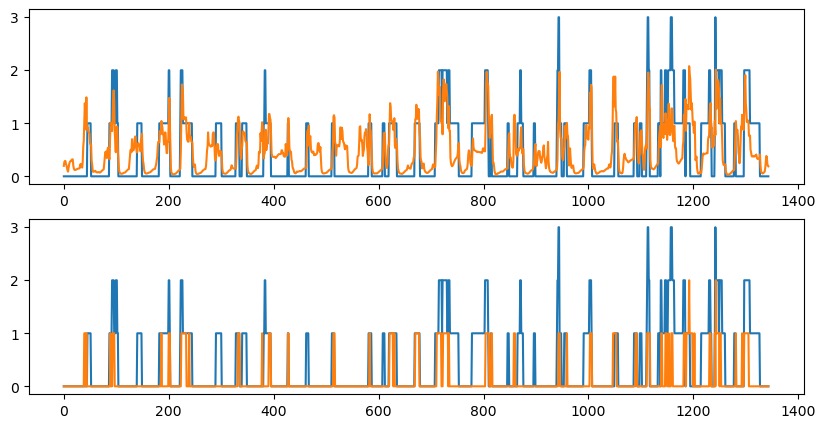

In [16]:
# Plot the prediction and the true value
CLUSTER = "WEBSTER"
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df[CLUSTER], label="True")
axs[1].plot(df[CLUSTER], label="True")
axs[0].plot(df[f"{CLUSTER}_pred"], label="Pred")
axs[1].plot(df[f"{CLUSTER}_pred"].astype(int), label="Pred")